<h1>Exercise 7.1 - Hasan Haq</h1>

<b>Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?</b>

In [92]:
# Import the modules needed to complete this exercise

from __future__ import print_function, division

import numpy as np
import first
import thinkstats2
import thinkplot
import scipy.stats
import pandas as pd

In [82]:
# Create the dataframe

live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

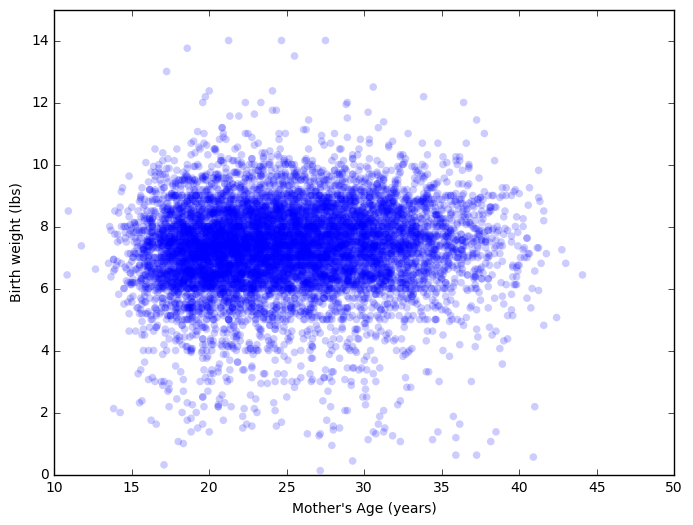

In [83]:
# Create a scatterplot from the data

thinkplot.Scatter(live.agepreg, live.totalwgt_lb)
thinkplot.Show(xlabel='Mother\'s Age (years)',
               ylabel='Birth weight (lbs)',
            axis=[10, 50, 0, 15], legend=False)

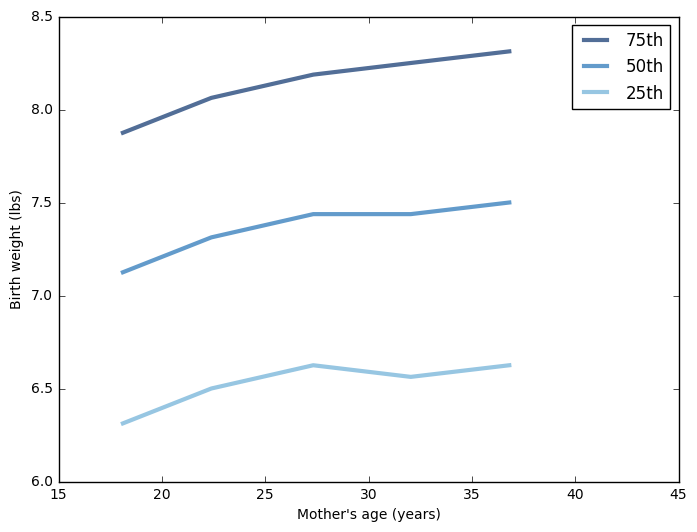

In [90]:
bins = np.arange(10, 46, 5)
indices = np.digitize(live.agepreg, bins)
groups = live.groupby(indices)

ages = [group.agepreg.mean() for i, group in groups][1:-1]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

thinkplot.PrePlot(3)

for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(ages, weights, label=label)

thinkplot.Show(xlabel="Mother's age (years)",
             ylabel='Birth weight (lbs)',
             xlim=[15, 45], legend=True)


In [95]:
# Create the functions we need to calculate Pearson's and Spearman's correlation

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [98]:
print('Corr', Corr(live.agepreg, live.totalwgt_lb))
print('SpearmanCorr', SpearmanCorr(live.agepreg, live.totalwgt_lb))

Corr 0.0688339703541
SpearmanCorr 0.0946100410966


<b>There does not appear to be a correlation between Mother's age and the birthweight of her child.  The correlation coefficient is less than 0.1, whether you use Pearson's or Spearman's method.

This means there is likely to be no linear relationship.  And based on the scatterplot, there does not appear to be any other pattern or relationship either.  However this could be due to the visualization methods we used.

When we plot the percentile of weight to binned ages, there is some evidence for a non-linear relationship because the rate of change between age and weight slows down as age increases.</b>